# Misc dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
graph = Graph_MCMC()
graph.read_from_ns("polbooks") #"soc_net_comms/amazon"

In [4]:
graph.print_info()
graph.rename_property("label", "_label")

Graph with N=105 nodes, E=441 edges and D=2 vertex features for training


True

In [5]:
graph.list_props()

name            (graph)   (type: string, val: polbooks)
description     (graph)   (type: string, val: A network of books about U.S.
                                              politics published close to the
                                              2004 U.S. presidential election,
                                              and sold by Amazon.com. Edges
                                              between books represent frequent
                                              copurchasing of those books by
                                              the same buyers. The network was
                                              compiled by V. Krebs and is
                                              unpublished.)
citation        (graph)   (type: string, val: ['V. Krebs, unpublished,
                                              http://www.orgnet.com/,
                                              http://www.orgnet.com/'])
url             (graph)   (type: string, val: http://

In [6]:

graph.convert_props_to_flags()

In [7]:
graph.list_props()

name            (graph)   (type: string, val: polbooks)
description     (graph)   (type: string, val: A network of books about U.S.
                                              politics published close to the
                                              2004 U.S. presidential election,
                                              and sold by Amazon.com. Edges
                                              between books represent frequent
                                              copurchasing of those books by
                                              the same buyers. The network was
                                              compiled by V. Krebs and is
                                              unpublished.)
citation        (graph)   (type: string, val: ['V. Krebs, unpublished,
                                              http://www.orgnet.com/,
                                              http://www.orgnet.com/'])
url             (graph)   (type: string, val: http://

In [8]:
graph.partition(B_min=3, B_max=3)

Performing inference...
Current bracket: (3, 3, 3) (1252.7929969294903, 1252.7929969294903, 1252.7929969294903)
Current bracket: (3, 3, 3) (1252.7929969294903, 1252.7929969294903, 1252.7929969294903)
Bisect at B = 3 with S = 1252.79299692949
Best result: B = 3, S = 1252.79299692949
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f570057b8e0, at 0x7f568f775d00>

In [9]:
graph.mcmc(num_iter=10000)

100%|██████████| 10000/10000 [00:02<00:00, 3724.45it/s]


11.697469040873882

Drawing soft partition


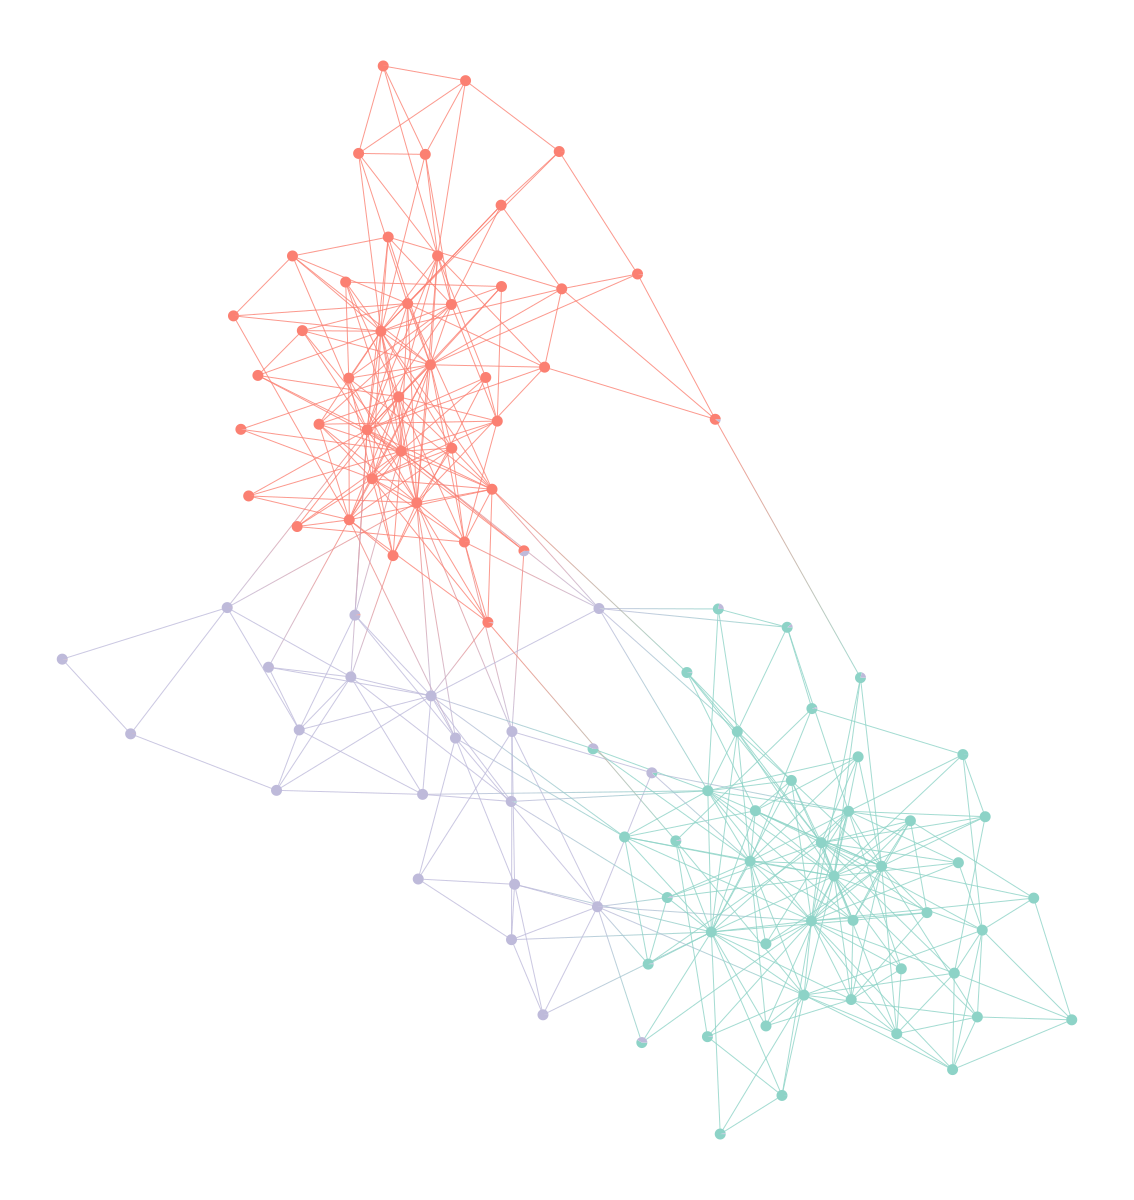

In [24]:
#graph.draw(gen_layout=False, output="polbooks-graph.png")
graph.draw(gen_layout=False)

Drawing block adjacency matrix $e_{rs}$


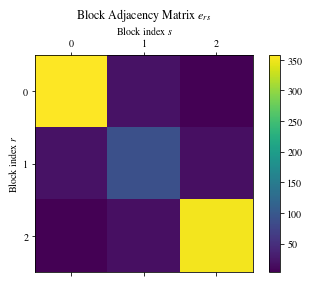

In [11]:
graph.plot_matrix()

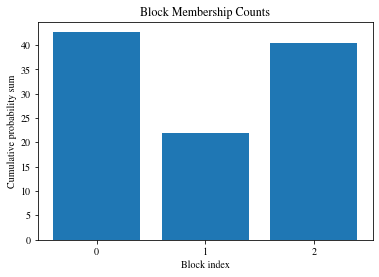

In [12]:
graph.plot_posterior_props()

## Train classifier

In [13]:
classifier = graph.sample_classifier_mala(1000, step_scaling=0.1, verbose=True)

100%|██████████| 1000/1000 [00:00<00:00, 1045.84it/s]Sample accept ratio: 83.8%
Train. set accuracy: 82.85714285714286%



## Interpret results

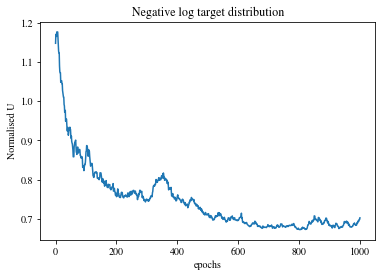

0.7479306495430832

In [14]:
classifier.plot_U()

In [15]:
classifier.thin_samples(burn_in_pc=30, thinning_pc=10)

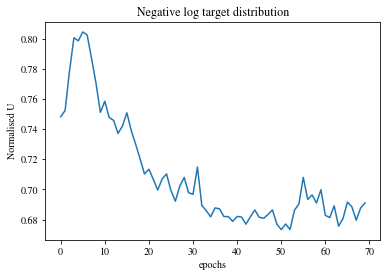

0.7093158402001838


In [16]:
u_mean = classifier.plot_U()
print(u_mean)

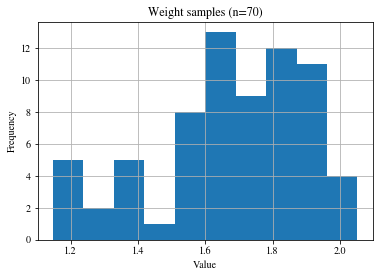

In [17]:
classifier.plot_sample_histogram()

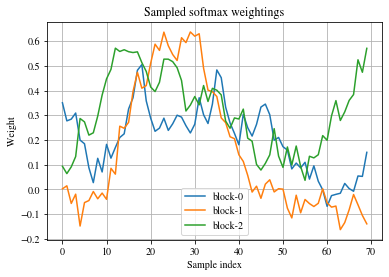

In [18]:
classifier.plot_sample_history()

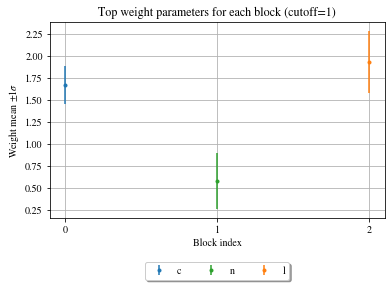

In [19]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

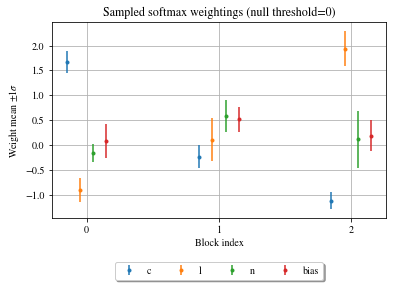

In [20]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0, legend=True)

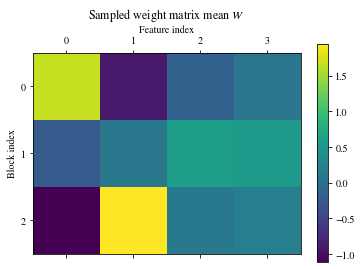

In [21]:
classifier.plot_sample_matrix()